# <font color='red'>Newton Raphon Method</font>
In this we are trying to Find common tangent to two curves using newton raphson method . The equation we use is Gibbs energy for a mixture and the common tangent have a lot of significance in thermodynamics


In [24]:
import numpy as np # General numerics
import matplotlib.pyplot as plt # Plotting
import sympy as sym

### <font color='red'>Material Properties</font>

In [25]:
gA_alpha = 0
gB_alpha = 0
gA_beta = -2
gB_beta = 2
omega = 10
R = 8.314
T = 1


In [26]:
x_alpha = sym.Symbol('x_alpha')#Now x_alpha is a variable so it can br differentiated 
x_beta = sym.Symbol('x_beta')

In [27]:
f_alpha = gA_alpha*x_alpha + gB_alpha*(1-x_alpha) + R*T*(x_alpha*sym.log(x_alpha) + (1-x_alpha)*sym.log(1-x_alpha))
f_beta = gA_beta*x_beta+gB_beta*(1-x_beta) + R*T*(x_beta*sym.log(x_beta)+(1-x_beta)*sym.log(1-x_beta))+omega*(x_beta*(1-x_beta))

In [28]:
f_alpha

8.314*x_alpha*log(x_alpha) + 8.314*(1 - x_alpha)*log(1 - x_alpha)

In [29]:
f_beta

10*x_beta*(1 - x_beta) + 8.314*x_beta*log(x_beta) - 4*x_beta + 8.314*(1 - x_beta)*log(1 - x_beta) + 2

In [30]:
sym.diff(f_beta,x_beta)

-20*x_beta + 8.314*log(x_beta) - 8.314*log(1 - x_beta) + 14.314 - (8.314 - 8.314*x_beta)/(1 - x_beta)

### <font color='red'> Plot Free Energies</font>

<IPython.core.display.Javascript object>


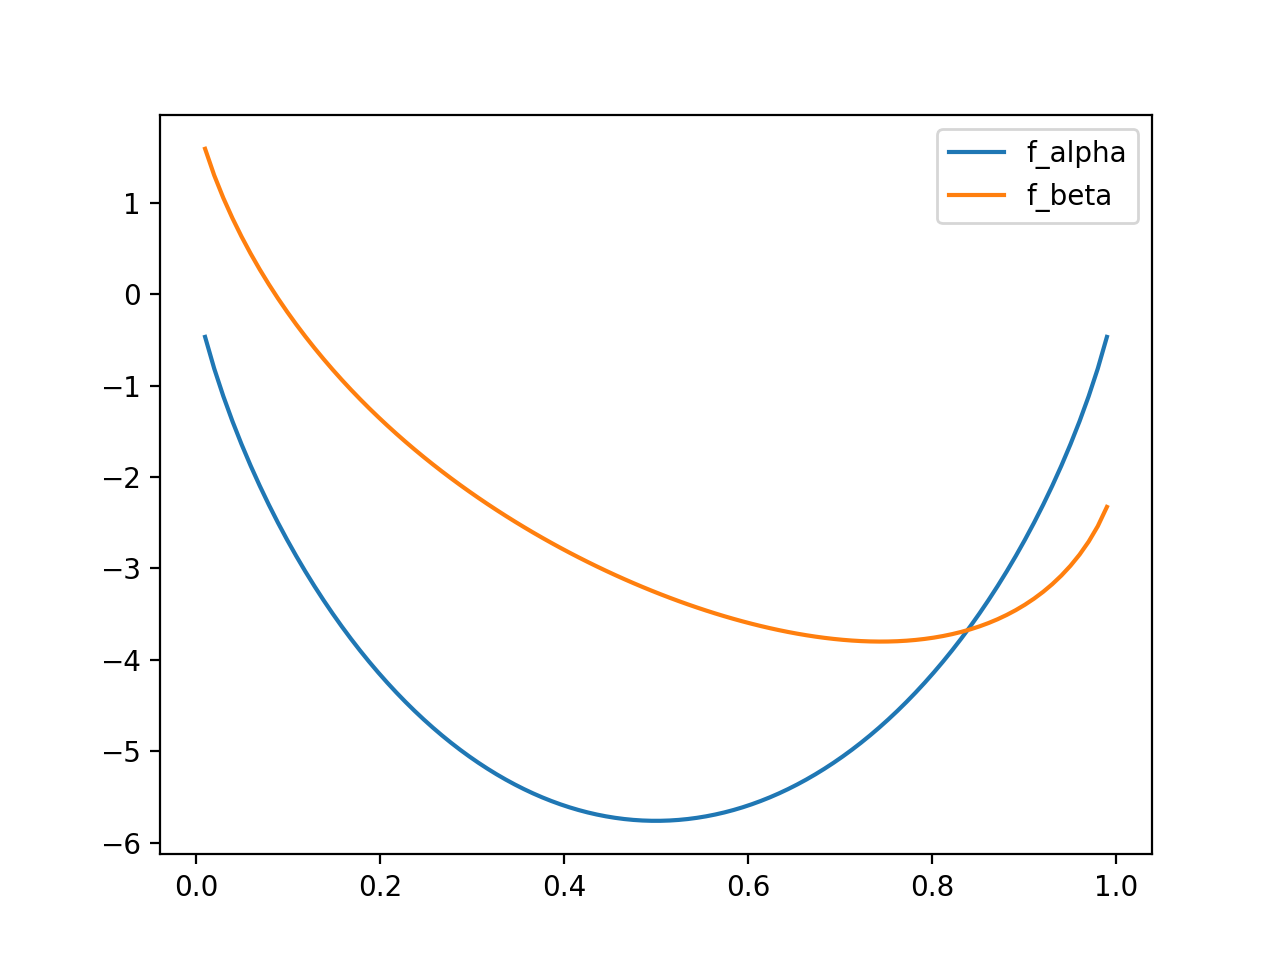

In [31]:
%matplotlib notebook
x1 = np.linspace(0.01,0.99,100)
f_alpha_func = sym.lambdify(x_alpha,f_alpha)# lambdify will convert the symbolic functiom to general function
f_beta_func = sym.lambdify(x_beta,f_beta)
plt.plot(x1, f_alpha_func(x1), label='f_alpha')
plt.plot(x1, f_beta_func(x1), label='f_beta')
plt.legend()
plt.show()


### <font color='red'>Create F and G</font>

In [32]:
df_alpha = sym.diff(f_alpha, x_alpha)#sym.diff will differentiate f_alpha with respect to x_alpha
df_beta = sym.diff(f_beta, x_beta)
int_alpha = f_alpha - x_alpha*df_alpha
int_beta = f_beta - x_beta*df_beta

In [33]:
df_alpha

8.314*log(x_alpha) - 8.314*log(1 - x_alpha) + 8.314 - (8.314 - 8.314*x_alpha)/(1 - x_alpha)

In [34]:
df_beta

-20*x_beta + 8.314*log(x_beta) - 8.314*log(1 - x_beta) + 14.314 - (8.314 - 8.314*x_beta)/(1 - x_beta)

In [35]:
int_alpha

-x_alpha*(8.314*log(x_alpha) - 8.314*log(1 - x_alpha) + 8.314 - (8.314 - 8.314*x_alpha)/(1 - x_alpha)) + 8.314*x_alpha*log(x_alpha) + 8.314*(1 - x_alpha)*log(1 - x_alpha)

In [36]:
int_beta

10*x_beta*(1 - x_beta) - x_beta*(-20*x_beta + 8.314*log(x_beta) - 8.314*log(1 - x_beta) + 14.314 - (8.314 - 8.314*x_beta)/(1 - x_beta)) + 8.314*x_beta*log(x_beta) - 4*x_beta + 8.314*(1 - x_beta)*log(1 - x_beta) + 2

In [37]:
F = df_alpha - df_beta
G = int_alpha - int_beta

In [38]:
F

20*x_beta + 8.314*log(x_alpha) - 8.314*log(x_beta) - 8.314*log(1 - x_alpha) + 8.314*log(1 - x_beta) - 6.0 + (8.314 - 8.314*x_beta)/(1 - x_beta) - (8.314 - 8.314*x_alpha)/(1 - x_alpha)

In [39]:
G

-x_alpha*(8.314*log(x_alpha) - 8.314*log(1 - x_alpha) + 8.314 - (8.314 - 8.314*x_alpha)/(1 - x_alpha)) + 8.314*x_alpha*log(x_alpha) - 10*x_beta*(1 - x_beta) + x_beta*(-20*x_beta + 8.314*log(x_beta) - 8.314*log(1 - x_beta) + 14.314 - (8.314 - 8.314*x_beta)/(1 - x_beta)) - 8.314*x_beta*log(x_beta) + 4*x_beta + 8.314*(1 - x_alpha)*log(1 - x_alpha) - 8.314*(1 - x_beta)*log(1 - x_beta) - 2

### <font color='red'>Jacobian Matrix</font>

In [40]:
d2f_alpha = sym.diff(df_alpha, x_alpha)
d2f_beta = sym.diff(df_beta, x_beta)
d_int_alpha = sym.diff(int_alpha, x_alpha)
d_int_beta = sym.diff(int_beta, x_beta)


### <font color='red'>Newton Raphon Iteration</font>

In [41]:
total_iterations = 10
x_guess = np.array([0.7,0.9])
x = x_guess
for i in range(total_iterations):
    #.evalf will evalute the function with the given inputs
    jacobian = np.array([[d2f_alpha.evalf(subs={x_alpha:x[0],x_beta:x[1]}),-d2f_beta.evalf(subs={x_alpha:x[0],x_beta:x[1]})],[d_int_alpha.evalf(subs={x_alpha:x[0],x_beta:x[1]}),-d_int_beta.evalf(subs={x_alpha:x[0],x_beta:x[1]})]])
    # here as it is calculated from a symbolic expretion no the jacobian is obect type so we need to type cast it
    jacobian = np.array(jacobian).astype(np.float64) #type casting jacobian
    inv_jacobian = np.linalg.inv(jacobian) #this will inverse the matrix
    x = x - np.dot(inv_jacobian, np.array([F.evalf(subs={x_alpha:x[0],x_beta:x[1]}),G.evalf(subs={x_alpha:x[0],x_beta:x[1]})]))
    print(i, x)

0 [0.733732744583695 0.929183055371653]
1 [0.732039035702686 0.924830052513884]
2 [0.731917089539305 0.924629002550213]
3 [0.731916863805514 0.924628616775000]
4 [0.731916863804681 0.924628616773581]
5 [0.731916863804681 0.924628616773581]
6 [0.731916863804681 0.924628616773581]
7 [0.731916863804681 0.924628616773581]
8 [0.731916863804681 0.924628616773581]
9 [0.731916863804681 0.924628616773581]


### <font color='red'> Plot Free Energies With Common Tangent</font>

In [42]:
slop = df_alpha.evalf(subs={x_alpha:x[0]})


In [43]:
 f_x=f_alpha.evalf(subs={x_alpha:x[0]})

In [44]:
y = f_x + slop*(x_alpha-x[0])



<IPython.core.display.Javascript object>


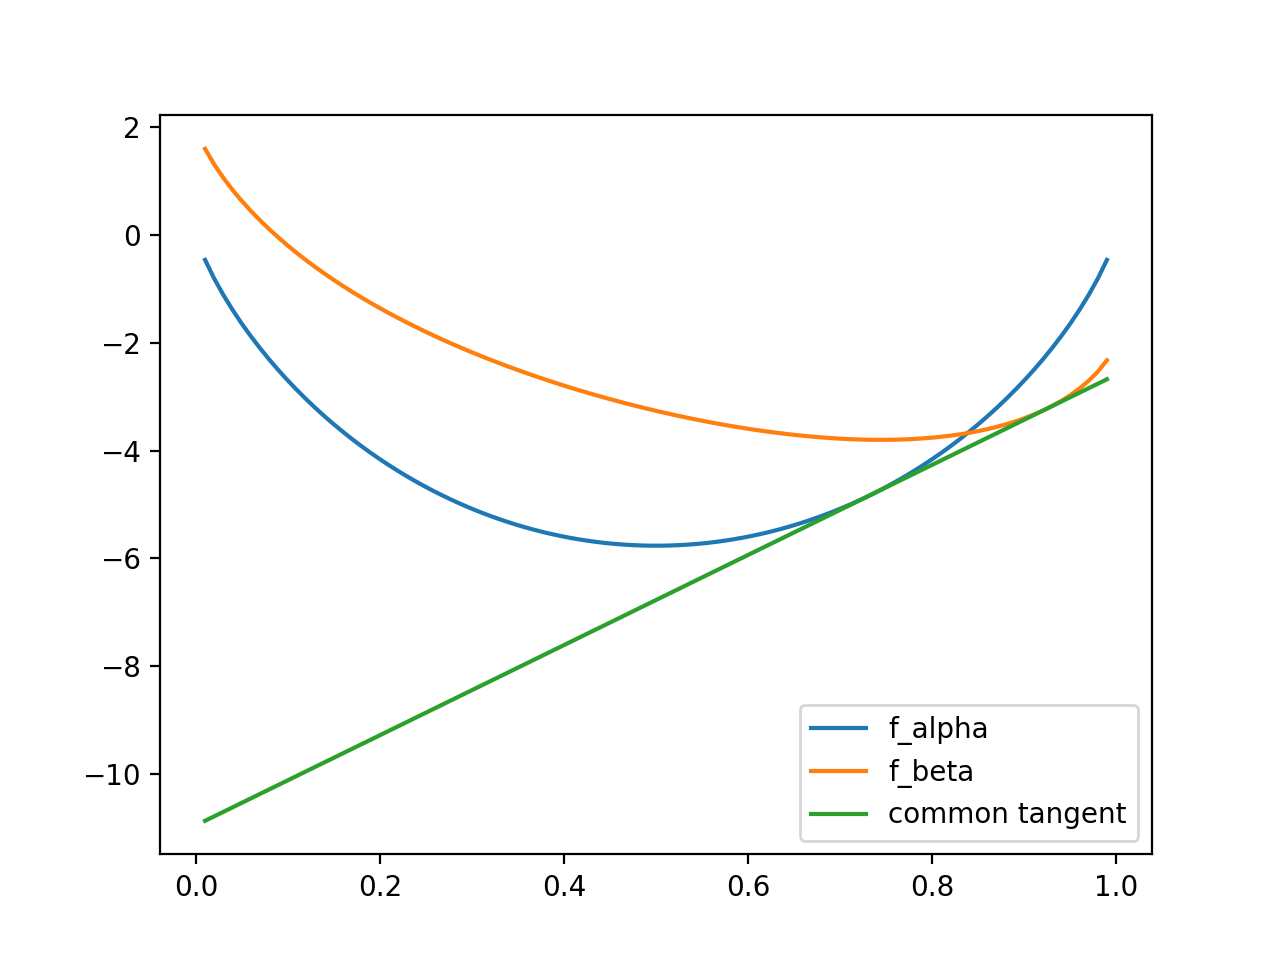

In [45]:
%matplotlib notebook
x1 = np.linspace(0.01,0.99,100)
f_alpha_func = sym.lambdify(x_alpha,f_alpha)# lambdify will convert the symbolic functiom to general function
f_beta_func = sym.lambdify(x_beta,f_beta)
y_func = sym.lambdify(x_alpha,y)
plt.plot(x1, f_alpha_func(x1), label='f_alpha')
plt.plot(x1, f_beta_func(x1), label='f_beta')
plt.plot(x1, y_func(x1), label='common tangent')
plt.legend()
plt.show()
